In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/sentimentdataset.csv')

# Inpect the data

In [4]:
df.head(5)  # first 5 rows

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [9]:
print("Number of columns: ", df.columns)

Number of columns:  Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')


In [10]:
print("Dimension: ", df.shape) # number of rows and columns

Dimension:  (732, 15)


In [12]:
print("information of data : ", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
information of data :  None


In [13]:
df.isnull().sum() # to check there is any null value or not

,0
Unnamed: 0.1,0
Unnamed: 0,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0


In [14]:
df.duplicated().sum() # to check the duplicate values

0

# Wrangle and Transform

In [15]:
# Drop unrelevant and unclear no-name columns from the dataset
df1 = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [16]:
# check statistical distribution of numerical variables
df1.describe()

,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [17]:
# Series.str.strip() in pandas: Remove leading and trailing characters in Series/Index.
df1['Text']= df1['Text'].str.strip()
df1['Sentiment']= df1['Sentiment'].str.strip()
df1['User']= df1['User'].str.strip()
df1['Platform']= df1['Platform'].str.strip()
df1['Hashtags']= df1['Hashtags'].str.strip()
df1['Country']= df1['Country'].str.strip()

In [18]:
# to see unique values in 'Platform' column
print("Print unique values in 'Platform'column: ", df1['Platform'].unique(), '\n')
print("Value counts in 'Platform' column: ", '\n', df1['Platform'].value_counts())

Print unique values in 'Platform'column:  ['Twitter' 'Instagram' 'Facebook'] 

Value counts in 'Platform' column:  
 Platform
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64


In [19]:
df1.sample(3)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
637,Hosted a 'memory lane' evening with old friend...,Gratitude,2023-07-16 14:00:00,SeniorMemoriesHost,Instagram,#FriendshipAdventures #SeniorNostalgia,30.0,60.0,USA,2023,7,16,14
136,Elation over discovering a hidden gem in the c...,Elation,2012-02-18 14:30:00,UrbanExplorer2,Twitter,#Elation #HiddenGem,20.0,40.0,USA,2012,2,18,14
347,Feeling empowered after conquering a challengi...,Empowerment,2018-09-05 14:20:00,HikingExplorer,Instagram,#Empowerment #HikingAdventure,35.0,70.0,USA,2018,9,5,14


In [22]:
# Transform the 'Timestamp' column to two columns, 'Date', 'Time'
import datetime as dt
df1['time'] = pd.to_datetime(df1.Timestamp)
df1['Date'] = df1['time'].dt.date
df1['Time'] = df1['time'].dt.time
#df1['new_Day']=df1['time'].dt.day
df1['Weekday']=df1['time'].dt.weekday  #<--- weekday value: 0 ~ 6
#df1.drop(['Timestamp', 'time'], axis=1) #<--- not working in here
df1.head(2)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,time,Date,Time,Weekday
0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,2023-01-15 12:30:00,2023-01-15,12:30:00,6
1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,2023-01-15 08:45:00,2023-01-15,08:45:00,6


In [23]:
# drop two columns: 'timestamp', 'time'
df2=df1.drop(['Timestamp', 'time'], axis=1)
df2.head(2)

,Text,Sentiment,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Date,Time,Weekday
0,Enjoying a beautiful day at the park!,Positive,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,2023-01-15,12:30:00,6
1,Traffic was terrible this morning.,Negative,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,2023-01-15,08:45:00,6


In [24]:
# Transform name of the column and create new column 'Month_name' using replace() function
df2['Monthname']=df2['Month'].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
df2['Weekdayname']=df2['Weekday'].replace([0,1,2,3,4,5,6], ['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
df2.head(2)

,Text,Sentiment,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Date,Time,Weekday,Monthname,Weekdayname
0,Enjoying a beautiful day at the park!,Positive,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,2023-01-15,12:30:00,6,Jan,Sun
1,Traffic was terrible this morning.,Negative,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,2023-01-15,08:45:00,6,Jan,Sun


In [25]:
df2.drop('Weekday', axis=1).sample(2)

,Text,Sentiment,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Date,Time,Monthname,Weekdayname
641,"Participated in a charity run, proving that ag...",Excitement,SeniorCharityRunner,Twitter,#RunForACause #SeniorSupport,30.0,60.0,Canada,2023,7,20,17,2023-07-20,17:00:00,Jul,Thur
660,Accidentally liked my crush's old photo while ...,Embarrassed,SocialMediaBlunderHighSchool,Instagram,#SocialMediaBlunder #HighSchoolAwkward,22.0,45.0,UK,2023,8,19,19,2023-08-19,19:45:00,Aug,Sat


In [26]:
# Check the value of columns: 'Monthname', 'Weekdayname'using np.unique()
print('Name of value in the Monthname column:', df2.Monthname.unique())
print('Name of value in the Weekdayname column: ', df2.Weekdayname.unique())

Name of value in the Monthname column: ['Jan' 'Feb' 'Mar' 'May' 'Aug' 'Jun' 'Nov' 'Apr' 'Sep' 'Jul' 'Oct' 'Dec']
Name of value in the Weekdayname column:  ['Sun' 'Mon' 'Tue' 'Wed' 'Thur' 'Fri' 'Sat']


# Visualization


Text(0.5, 1.0, 'Kinds of Sentiment in descending order')

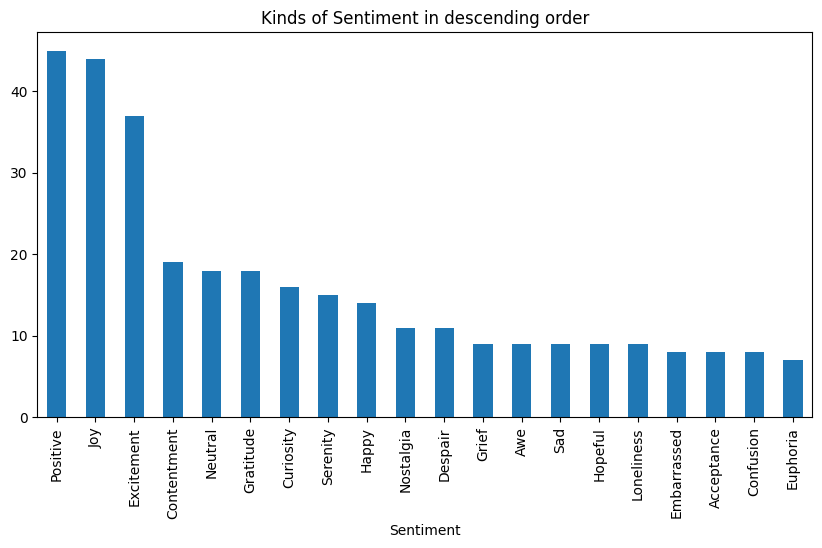

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
df2['Sentiment'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Kinds of Sentiment in descending order")

Text(0.5, 1.0, 'Proportion of Platform')

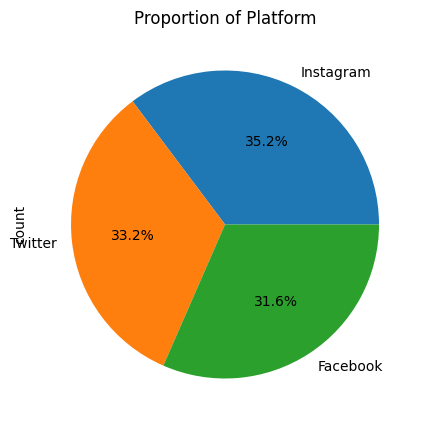

In [28]:

plt.figure(figsize=(10, 5))
df2['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Proportion of Platform")
#plt.legend()

<Axes: xlabel='Country'>

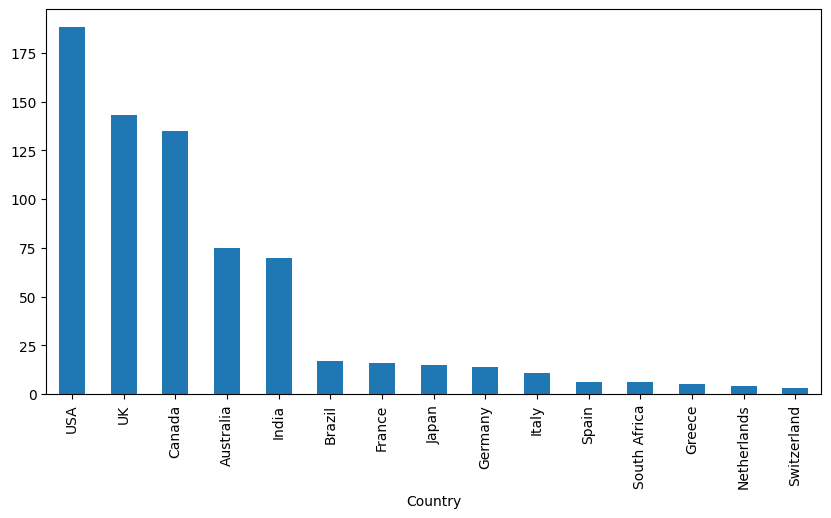

In [29]:
plt.figure(figsize=(10, 5))
df2['Country'].value_counts().nlargest(15).plot(kind='bar')

<Axes: xlabel='Country'>

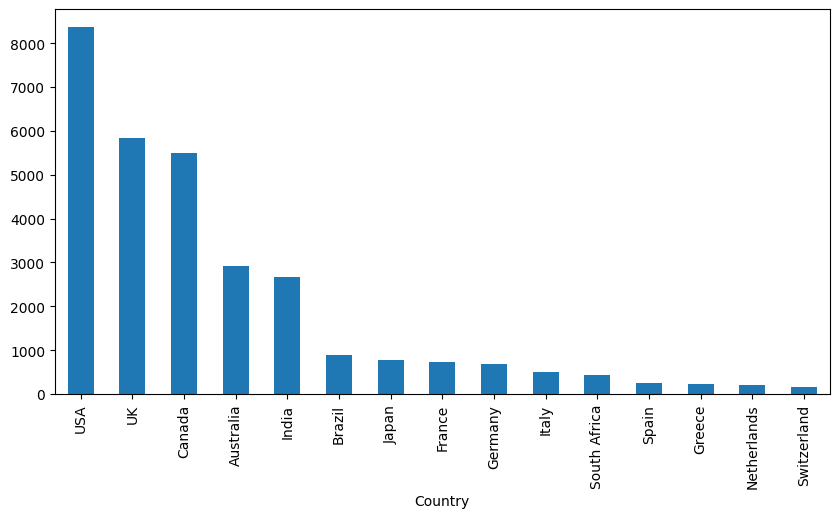

In [30]:

plt.figure(figsize=(10, 5))
df2.groupby('Country')['Likes'].sum().nlargest(15).plot(kind='bar')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '#Wonder #StargazingAdventure'),
  Text(1, 0, '#Playful #CarnivalEscapade'),
  Text(2, 0, '#Harmony #MusicalUnity'),
  Text(3, 0, '#Proud #ScalingPeaks'),
  Text(4, 0, '#Compassionate #TearsOfEmpathy'),
  Text(5, 0, '#Coziness #WarmWinterEvening'),
  Text(6, 0, '#Inspiration #ForestWhispers'),
  Text(7, 0, '#Playful #JugglingResponsibilities'),
  Text(8, 0, '#Radiance #SpringBlooms'),
  Text(9, 0, '#TimelessTunes #SeniorJazz')])

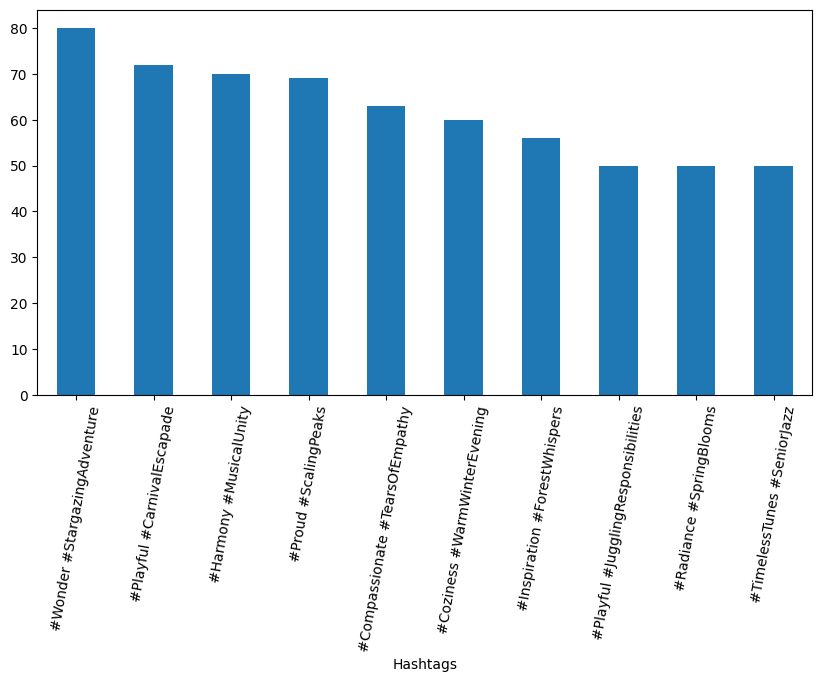

In [32]:
plt.figure(figsize=(10, 5))
df3=df2.groupby('Hashtags')['Retweets'].sum().nlargest(10).sort_values(ascending=False)
df3.plot(kind='bar')
plt.xticks(rotation=80)
#control test angle
